<a href="https://colab.research.google.com/github/perfectism13/learning_colab/blob/master/!o_Getting_the_predictions_on_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r'/content/drive/My Drive/colab/mlnd_distracted_driver_detection/state-farm-distracted-driver-detection/imgs/')
print(os.getcwd())
!ls
!pip install keras==2.1.5
import keras
print(keras.__version__)
!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/colab/mlnd_distracted_driver_detection/state-farm-distracted-driver-detection/imgs
driver_imgs_list.csv	    my_model11.h5  my_model1.h5		  test	 vect
driver_imgs_list_right.csv  my_model12.h5  my_model9.h5		  train
my_model10.h5		    my_model13.h5  sample_submission.csv  valid
2.1.5
Tue Jan 28 13:48:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 

In [0]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers


#get_im_cv2


In [0]:
# Load a preprocessed image
def get_im_cv2(path, img_size):
    img = cv2.imread(path)
    img = np.array(img, dtype=np.float32)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # reduce size
    img = cv2.resize(img, (img_size, img_size))
    # normalization
    img /= 127.5
    img -= 1.
    #print (img[1:5, 1:5, 0])
    return img

#载入一个司机的所有训练照片

In [11]:
# labels is the image array
val_image = []
clean_image = []
i = 0

index = os.path.join('.', 'driver_imgs_list.csv')
#以只读方式打开该文件
f = open(index, 'r')
lines = f.readlines()
class_list = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

# files = sorted(os.listdir('/home/jupyter/Selected Images'))
# for i in range(len(files)):
#     if i == 0:
#         continue
#     else:
#         img = cv2.imread('/home/jupyter/Selected Images/'+files[i])
#         clean_image.append(img)
#         img = img[50:,120:-50]
#         img = cv2.resize(img,(224,224))
#         val_image.append(img)

for line in lines[1:726]:
    arr = line.strip().split(',')
    p = os.path.join('.', 'train', arr[1], arr[2])
    img = cv2.imread(p)
    clean_image.append(img)
    img = get_im_cv2(p,299)
    val_image.append(img)
    # predictions = model.predict(np.expand_dims(get_im_cv2(p,299), axis=0))
    # predictions = predictions[0]    
    # pred_idx = np.argmax(predictions)
    # #print (class_list[pred_idx], arr[1])
    # if class_list[pred_idx] != arr[1]:
    #     error.append(arr[2])
    # else :
    #   right.append(arr[2]) 

print('All images are loaded')


All images are loaded


In [13]:
## Splitting the train and test

X_test = []

for features in val_image:
    X_test.append(features)
    

print (len(X_test))

725


In [16]:
## Converting images to nparray. Encoding the Y

# X_test = np.array(X_test).reshape(-1,229,229,3)
X_test = np.array(X_test)

print (X_test.shape)

(725, 299, 299, 3)


#载入训练好的模型

In [18]:
from keras.models import *
model = load_model('my_model12.h5')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




#获取预测结果

In [19]:
# labels is the image array

from sklearn.metrics import accuracy_score, confusion_matrix

model1_prediction = []
model1_pred_class = []

model1_prediction = model.predict(X_test)
print('Images Predicted until now:',len(model1_prediction))


Images Predicted until now: 725


### Exception Model: Extra Layers - Accuracy 82.5% Loss 0.52

In [0]:
## Defining the input

from keras.layers import Input
xception_input = Input(shape = (224, 224, 3), name = 'Image_input')

## The RESNET model

from keras.applications.xception import preprocess_input, decode_predictions
from keras.applications.xception import Xception


#Get the RESNET weights and layers

model_xception_conv = Xception(weights= 'imagenet', include_top=False, input_shape= (224,224,3))

from keras.models import Model


output_xception_conv = model_xception_conv(xception_input)

#Add the fully-connected layers 

x=GlobalAveragePooling2D()(output_xception_conv)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.1)(x) # **reduce dropout 
x=Dense(1024,activation='relu')(x) #dense layer 2
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu')(x) #dense layer 3
x = Dense(10, activation='softmax', name='predictions')(x)


xception_pretrained = Model(input = xception_input, output = x)

xception_pretrained = Model(input = xception_input, output = x)
xception_pretrained.load_weights('xception_weights_aug_extralayer_alltrained_sgd2_V2.hdf5')

print('Model is Loaded')


Model is Loaded


In [0]:
# labels is the image array

from sklearn.metrics import accuracy_score, confusion_matrix

model1_prediction = []
model1_pred_class = []

model1_prediction = xception_pretrained.predict(X_test)
print('Images Predicted until now:',len(model1_prediction))



Images Predicted until now: 117


### Exception Model: No Extra Layers - Accuracy 82.8% Loss 0.55

In [0]:
## Defining the input

from keras.layers import Input
xception_input = Input(shape = (224, 224, 3), name = 'Image_input')

## The RESNET model

from keras.applications.xception import preprocess_input, decode_predictions
from keras.applications.xception import Xception


#Get the RESNET weights and layers

model_xception_conv = Xception(weights= 'imagenet', include_top=False, input_shape= (224,224,3))

from keras.models import Model


output_xception_conv = model_xception_conv(xception_input)

#Add the fully-connected layers 

x = Flatten(name='flatten')(output_xception_conv)
x = Dense(10, activation='softmax', name='predictions')(x)


xception_pretrained = Model(input = xception_input, output = x)

xception_pretrained = Model(input = xception_input, output = x)
xception_pretrained.load_weights('xception_weights_aug_alltrained_setval_sgd3.hdf5')

print('Model is Loaded')

Model is Loaded


In [0]:
# labels is the image array

model2_prediction = []
model2_pred_class = []

model2_prediction = xception_pretrained.predict(X_test)
print('Images Predicted until now:',len(model2_prediction))



Images Predicted until now: 117


### RESNET 50 Model: No Extra Layers - Accuracy 85.43% Loss 0.55

In [0]:
## Defining the input
from keras.layers import Input
from keras.models import Model
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50


resnet50_input = Input(shape = (224, 224, 3), name = 'Image_input')
model_resnet50_conv = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))

output_resnet50_conv = model_resnet50_conv(resnet50_input)

x = Flatten(name='flatten')(output_resnet50_conv)
x = Dense(10, activation='softmax', name='predictions')(x)
resnet50_pretrained = Model(input = resnet50_input, output = x)

resnet50_pretrained.load_weights('resnet_weights_aug_alltrained_sgd2_setval.hdf5')

print('Model is Loaded')



Model is Loaded


In [0]:
# labels is the image array


model3_prediction = []
model3_pred_class = []

model3_prediction = resnet50_pretrained.predict(X_test)
print('Images Predicted until now:',len(model3_prediction))



Images Predicted until now: 117


### RESNET 50 Model: Extra Layers - Accuracy 86.43% Loss 0.47

In [0]:
## Defining the input

from keras.layers import Input
from keras.models import Model
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50

resnet50_input = Input(shape = (224, 224, 3), name = 'Image_input')

## The RESNET model
model_resnet50_conv = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))



output_resnet50_conv = model_resnet50_conv(resnet50_input)
x=GlobalAveragePooling2D()(output_resnet50_conv)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.1)(x) # **reduce dropout 
x=Dense(1024,activation='relu')(x) #dense layer 2
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
x = Dense(10, activation='softmax', name='predictions')(x)


resnet50_pretrained = Model(input = resnet50_input, output = x)

resnet50_pretrained.load_weights('resnet_weights_aug_extralayers_sgd_setval.hdf5')


print('Model is loaded')


Model is loaded


In [0]:
# labels is the image array


model4_prediction = []
model4_pred_class = []

model4_prediction = resnet50_pretrained.predict(X_test)
print('Images Predicted until now:',len(model4_prediction))


Images Predicted until now: 117


### VGG 16 Model: No Extra Layers - Accuracy 84.7% Loss 0.5

In [0]:
## Defining the input

from keras.layers import Input
from keras.models import Model


vgg16_input = Input(shape = (224, 224, 3), name = 'Image_input')

from keras.applications.vgg16 import VGG16, preprocess_input

model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_tensor = vgg16_input)



output_vgg16_conv = model_vgg16_conv(vgg16_input)

x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(10, activation='softmax', name='predictions')(x)

vgg16_pretrained = Model(input = vgg16_input, output = x)


vgg16_pretrained.load_weights('vgg_weights_aug_setval_sgd.hdf5')

print('The Model is loaded')

The Model is loaded


In [0]:
# labels is the image array


model5_prediction = []
model5_pred_class = []

model5_prediction = vgg16_pretrained.predict(X_test)
print('Images Predicted until now:',len(model5_prediction))


Images Predicted until now: 117


### VGG 16 Model: Extra Layers - Accuracy 81.5% Loss 0.57

In [0]:
## Defining the input

from keras.layers import Input
from keras.models import Model


vgg16_input = Input(shape = (224, 224, 3), name = 'Image_input')

from keras.applications.vgg16 import VGG16, preprocess_input

model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_tensor = vgg16_input)



output_vgg16_conv = model_vgg16_conv(vgg16_input)

x=GlobalAveragePooling2D()(output_vgg16_conv)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.1)(x) # **reduce dropout 
x=Dense(1024,activation='relu')(x) #dense layer 2
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu')(x) #dense layer 3
x = Dense(10, activation='softmax', name='predictions')(x)

vgg16_pretrained = Model(input = vgg16_input, output = x)


vgg16_pretrained.load_weights('vgg_weights_aug_setval_layers_sgd2.hdf5')

print('The Model is loaded')

The Model is loaded


In [0]:
# labels is the image array


model6_prediction = []
model6_pred_class = []

model6_prediction = vgg16_pretrained.predict(X_test)
print('Images Predicted until now:',len(model6_prediction))



Images Predicted until now: 117


### Ensembling

In [20]:
from statistics import mean,median
predictions = []
ensemble_predictions = []

for i in range(len(X_test)):
#for i in range(1):
    mean_prediction = []
    
    for j in range(10):
        predictions.append(model1_prediction[i][j])
        # predictions.append(model2_prediction[i][j])
        # predictions.append(model3_prediction[i][j])
        # predictions.append(model4_prediction[i][j])
        # predictions.append(model5_prediction[i][j])
        # predictions.append(model6_prediction[i][j])
        #print(predictions)
        
        trimmed_value = (sum(predictions) - max(predictions) - min(predictions))/(len(predictions) - 2)
        
        mean_value = mean(predictions)

        predictions = []
        mean_prediction.append(trimmed_value)
        #mean_prediction.append(mean_value)
    
    mean_prediction = mean_prediction/ sum(mean_prediction)
    ensemble_predictions.append(mean_prediction)
        
    
#ensemble_predictions = np.asarray(ensemble_predictions)        
print('Got predictions from ensemble')
    

Got predictions from ensemble


In [0]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "On the phone - right",
"C3": "texting - left",
"C4": "On the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

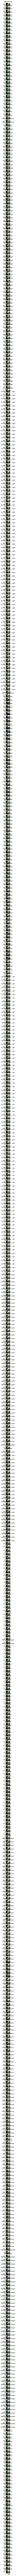

In [22]:
# labels is the image array

i = 0
tags_previous = ''
cntr = 0
#fig, ax = plt.subplots(20, 1, figsize = (200,200))

fig, ax = plt.subplots(len(ensemble_predictions), 1, figsize = (400,400))

for i in range(len(ensemble_predictions)):
#for i in range(40,60):
    predicted_class = 'C'+str(np.where(ensemble_predictions[i] == np.amax(ensemble_predictions[i]))[0][0])
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = tags[predicted_class].upper()+':'+str(round(ensemble_predictions[i].max()*100,0))+'%'
    if tags[predicted_class] != tags_previous:
        cntr = 0

    if tags[predicted_class] == 'safe driving':
        cv2.putText(clean_image[i],text,(40,35), font, 0.8 ,(0,256,0),2)
    else:
        if cntr >= 0:
            cv2.putText(clean_image[i],text,(40,35), font, 0.8 ,(0,0,256),2)
        else:
            text = str(cntr+1)
            cntr = cntr+1
            print('came here')
            cv2.putText(clean_image[i],text,(40,35), font, 0.8 ,(0,0,256),2)

    tags_previous = tags[predicted_class]

    j = i-40 
    ax[j].imshow(clean_image[i].squeeze())
    ax[j].set_title(tags[predicted_class])

    plt.show
    

In [0]:
out = cv2.VideoWriter('Ensembled_Predictedvideo New.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 3, (640,480))
 
for i in range(len(clean_image)):
    out.write(clean_image[i])
out.release()